<a href="https://colab.research.google.com/github/kairamilanifitria/NLP-Projects/blob/main/Project%202%20Text%20Summarization/Fix/1.%20Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the TRAIN_CSV

## preparing column, convert to normal text

In [1]:
import pandas as pd

In [25]:
train_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/normalized_dataset/train_normalized.csv')

In [26]:
train_df.iloc[1]

,1
id,205215
url,https://www.liputan6.com/news/read/205215/defo...
clean_article,"[['Striker', 'Timnas', 'Inggris', 'yang', 'ber..."
clean_summary,"[['Pertandingan', 'melawan', 'Manchester', 'Ci..."
extractive_summary,"[0, 8]"
rebuilt_extractive_summary,"[['Striker', 'Timnas', 'Inggris', 'yang', 'ber..."
text,striker timnas inggris yang main s...
summary,tanding lawan manchester city rupa ...
e_summary,striker timnas inggris yang main sama tottenha...


In [27]:
# drop the column "extractive_summary", "text, "summary", and "e_summary"
train_df = train_df.drop(['id', 'url', 'extractive_summary', 'text', 'summary', 'e_summary'], axis=1)

In [28]:
# rename the column "clean_article" into "original_text"
train_df = train_df.rename(columns={"clean_article": "original_text"})
train_df = train_df.rename(columns={"clean_summary": "abstractive_summary"})
train_df = train_df.rename(columns={"rebuilt_extractive_summary": "extractive_summary"})

In [29]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to create new columns
train_df['original_text'] = train_df['original_text'].apply(clean_text)
train_df['abstractive_summary'] = train_df['abstractive_summary'].apply(clean_text)
train_df['extractive_summary'] = train_df['extractive_summary'].apply(clean_text)

In [31]:
train_df.head()

,original_text,abstractive_summary,extractive_summary
0,liputan6 com jakarta setelah menjalani ujian n...,artis muda haykal dan putri titan akan memasuk...,liputan6 com jakarta setelah menjalani ujian n...
1,striker timnas inggris yang bermain bersama to...,pertandingan melawan manchester city merupakan...,striker timnas inggris yang bermain bersama to...
2,liputan6 com jakarta harga sejumlah kebutuhan ...,harga bahan pokok seperti minyak goreng telur ...,liputan6 com jakarta harga sejumlah kebutuhan ...
3,liputan6 com kupang evakuasi warga negara indo...,evakuasi warga negara indonesia dari timor les...,dalam empat hari ini 1 540 wni telah diangkut ...
4,liputan6 com lembata pusat vulkanologi dan mit...,status gunung batutara ditetapkan siaga tiga k...,lahar panas juga keluar dari bagian sebelah ti...


In [46]:
# download train_df into csv in my local
from google.colab import files

train_df.to_csv('train_df.csv', encoding = 'utf-8-sig')
files.download('train_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Remove outlier based on text length

In [51]:
# shape before outlier removed
train_df.shape

(193883, 3)

In [68]:
# prompt: see the outliers from train_df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_original_text = train_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_original_text = train_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_original_text = Q3_original_text - Q1_original_text
lower_bound_original_text = Q1_original_text - 1.5 * IQR_original_text
upper_bound_original_text = Q3_original_text + 1.5 * IQR_original_text

Q1_abstractive_summary = train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_abstractive_summary = train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_abstractive_summary = Q3_abstractive_summary - Q1_abstractive_summary
lower_bound_abstractive_summary = Q1_abstractive_summary - 1.5 * IQR_abstractive_summary
upper_bound_abstractive_summary = Q3_abstractive_summary + 1.5 * IQR_abstractive_summary


Q1_extractive_summary = train_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_extractive_summary = train_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_extractive_summary = Q3_extractive_summary - Q1_extractive_summary
lower_bound_extractive_summary = Q1_extractive_summary - 1.5 * IQR_extractive_summary
upper_bound_extractive_summary = Q3_extractive_summary + 1.5 * IQR_extractive_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = train_df[
    ~(train_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
      train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
      train_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary))
]

print("Outliers in train_df:")
print(outliers)

Outliers in train_df:
Empty DataFrame
Columns: [original_text, abstractive_summary, extractive_summary, original_text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [69]:
# delete those rows as outlier in train_df

# Remove rows with outliers
train_df = train_df[
    train_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
    train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
    train_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary)
]

print("DataFrame shape after removing outliers:", train_df.shape)

DataFrame shape after removing outliers: (159844, 6)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

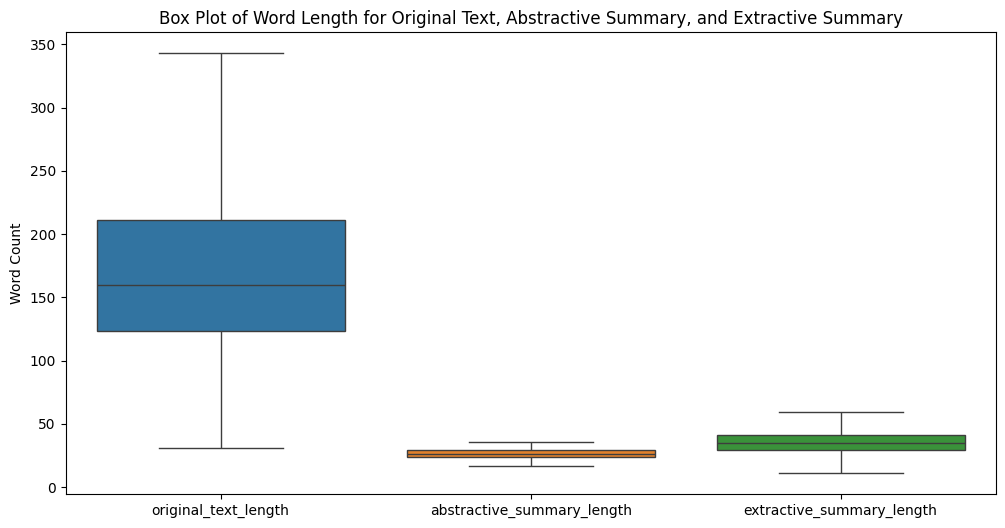

In [70]:
# make a boxplot based on train_df for column original_text, abstractive_summary, and extractive_summary

plt.figure(figsize=(12, 6))
train_df['original_text_length'] = train_df['original_text'].apply(lambda x: len(str(x).split()))
train_df['abstractive_summary_length'] = train_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
train_df['extractive_summary_length'] = train_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=train_df[['original_text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Original Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')
plt.show()


In [79]:
# drop column original_text_length, abstractive_summary_length, extractive_summary_length

#train_df = train_df.drop(['original_text_length', 'abstractive_summary_length', 'extractive_summary_length'], axis=1)


In [84]:
train_df.shape

(159844, 3)

In [85]:
# download train_df with no outlier into csv in my local
from google.colab import files

train_df.to_csv('train_df.csv', encoding = 'utf-8-sig')
files.download('train_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## random sampling 20k row train_df

In [96]:
# random sampling 20.000 data from train_df

sampled_train_df = train_df.sample(n=30000, random_state=42)


In [97]:
sampled_train_df.shape

(30000, 3)

In [104]:
# prompt: see the outliers from train_df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_original_text = sampled_train_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_original_text = sampled_train_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_original_text = Q3_original_text - Q1_original_text
lower_bound_original_text = Q1_original_text - 1.5 * IQR_original_text
upper_bound_original_text = Q3_original_text + 1.5 * IQR_original_text

Q1_abstractive_summary = sampled_train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_abstractive_summary = sampled_train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_abstractive_summary = Q3_abstractive_summary - Q1_abstractive_summary
lower_bound_abstractive_summary = Q1_abstractive_summary - 1.5 * IQR_abstractive_summary
upper_bound_abstractive_summary = Q3_abstractive_summary + 1.5 * IQR_abstractive_summary


Q1_extractive_summary = sampled_train_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_extractive_summary = sampled_train_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_extractive_summary = Q3_extractive_summary - Q1_extractive_summary
lower_bound_extractive_summary = Q1_extractive_summary - 1.5 * IQR_extractive_summary
upper_bound_extractive_summary = Q3_extractive_summary + 1.5 * IQR_extractive_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = sampled_train_df[
    ~(sampled_train_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
      sampled_train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
      sampled_train_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary))
]

print("Outliers in train_df:")
print(outliers)

Outliers in train_df:
Empty DataFrame
Columns: [original_text, abstractive_summary, extractive_summary, original_text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [105]:
# delete those rows as outlier in train_df

# Remove rows with outliers
sampled_train_df = sampled_train_df[
    sampled_train_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
    sampled_train_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
    sampled_train_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary)
]

print("DataFrame shape after removing outliers:", sampled_train_df.shape)

DataFrame shape after removing outliers: (29842, 6)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

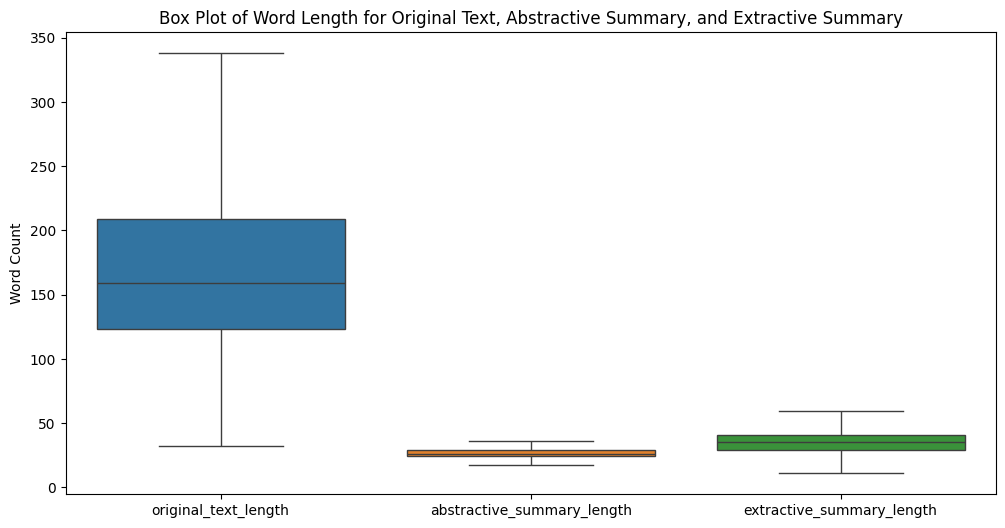

In [106]:
# make a boxplot based on train_df for column original_text, abstractive_summary, and extractive_summary

plt.figure(figsize=(12, 6))
sampled_train_df['original_text_length'] = sampled_train_df['original_text'].apply(lambda x: len(str(x).split()))
sampled_train_df['abstractive_summary_length'] = sampled_train_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
sampled_train_df['extractive_summary_length'] = sampled_train_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=sampled_train_df[['original_text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Original Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')
plt.show()


In [107]:
sampled_train_df.shape

(29842, 6)

In [108]:
# download sampled_train_df with 20k data with no outlier into csv in my local
from google.colab import files

sampled_train_df.to_csv('train_df.csv', encoding = 'utf-8-sig')
files.download('train_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prepare the DEV_CSV

## preparing column, convert to normal text

In [22]:
import pandas as pd

In [33]:
dev_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/normalized_dataset/dev_normalized.csv')

In [34]:
dev_df.iloc[1]

,1
id,10628
url,https://www.liputan6.com/news/read/10628/pengu...
clean_article,"[['Liputan6', '.', 'com', ',', 'Surabaya', ':'..."
clean_summary,"[['Gubernur', 'Jawa', 'Timur', 'meminta', 'par..."
extractive_summary,"[2, 3]"
rebuilt_extractive_summary,"[['Hingga', 'kini', ',', 'ada', 'sekitar', '90..."
text,liputan6 com surabaya toko...
summary,gubernur jawa timur minta para gub...
e_summary,hingga kini ada sekitar 90 ribu ungsi masuk k...


In [35]:
# drop the column "extractive_summary", "text, "summary", and "e_summary"
dev_df = dev_df.drop(['id', 'url', 'extractive_summary', 'text', 'summary', 'e_summary'], axis=1)

In [36]:
# rename the column "clean_article" into "original_text"
dev_df = dev_df.rename(columns={"clean_article": "original_text"})
dev_df = dev_df.rename(columns={"clean_summary": "abstractive_summary"})
dev_df = dev_df.rename(columns={"rebuilt_extractive_summary": "extractive_summary"})

In [37]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to create new columns
dev_df['original_text'] = dev_df['original_text'].apply(clean_text)
dev_df['abstractive_summary'] = dev_df['abstractive_summary'].apply(clean_text)
dev_df['extractive_summary'] = dev_df['extractive_summary'].apply(clean_text)

In [38]:
dev_df.head()

,original_text,abstractive_summary,extractive_summary
0,liputan6 com jakarta sejumlah tokoh masyarakat...,sejumlah tokoh masyarakat riau membantah perny...,liputan6 com jakarta sejumlah tokoh masyarakat...
1,liputan6 com surabaya tokoh madura dan kaliman...,gubernur jawa timur meminta para gubernur se k...,hingga kini ada sekitar 90 ribu pengungsi masu...
2,liputan6 com medan ratusan kepala keluarga nya...,warga binjai timur sumut nyaris bentrok dengan...,liputan6 com medan ratusan kepala keluarga nya...
3,liputan6 com jakarta basilio araujo salah seor...,tokoh prointegrasi timtim menduga surat yang m...,sebab sejumlah nama yang disebut sebut dalam s...
4,liputan6 com jakarta harga sembilan bahan poko...,harga sembako merangkak naik para pedagang di ...,kendati demikian para pedagang memperkirakan k...


In [48]:
# download dev_df into csv in my local
from google.colab import files

dev_df.to_csv('dev_df.csv', encoding = 'utf-8-sig')
files.download('dev_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Remove outlier based on text length

In [109]:
# shape before outlier removed
dev_df.shape

(10972, 3)

In [124]:
# prompt: see the outliers from train_df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_original_text = dev_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_original_text = dev_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_original_text = Q3_original_text - Q1_original_text
lower_bound_original_text = Q1_original_text - 1.5 * IQR_original_text
upper_bound_original_text = Q3_original_text + 1.5 * IQR_original_text

Q1_abstractive_summary = dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_abstractive_summary = dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_abstractive_summary = Q3_abstractive_summary - Q1_abstractive_summary
lower_bound_abstractive_summary = Q1_abstractive_summary - 1.5 * IQR_abstractive_summary
upper_bound_abstractive_summary = Q3_abstractive_summary + 1.5 * IQR_abstractive_summary


Q1_extractive_summary = dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_extractive_summary = dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_extractive_summary = Q3_extractive_summary - Q1_extractive_summary
lower_bound_extractive_summary = Q1_extractive_summary - 1.5 * IQR_extractive_summary
upper_bound_extractive_summary = Q3_extractive_summary + 1.5 * IQR_extractive_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = dev_df[
    ~(dev_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
      dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
      dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary))
]

print("Outliers in dev_df:")
print(outliers)

Outliers in dev_df:
Empty DataFrame
Columns: [original_text, abstractive_summary, extractive_summary, original_text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [125]:
# delete those rows as outlier in dev_df
# Remove rows with outliers

dev_df = dev_df[
    dev_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
    dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
    dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary)
]

print("DataFrame shape after removing outliers:", dev_df.shape)

DataFrame shape after removing outliers: (9540, 6)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

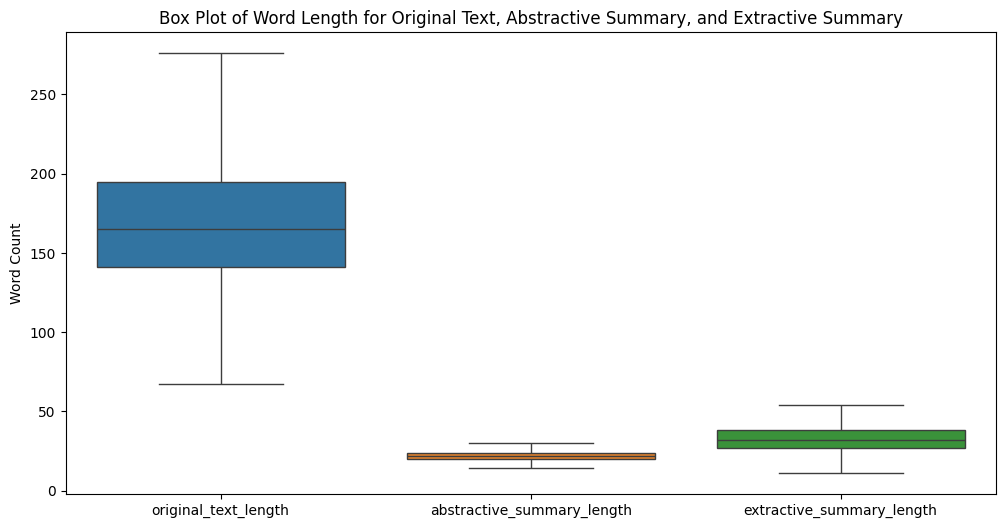

In [126]:
# make a boxplot based on dev_df for column original_text, abstractive_summary, and extractive_summary

plt.figure(figsize=(12, 6))
dev_df['original_text_length'] = dev_df['original_text'].apply(lambda x: len(str(x).split()))
dev_df['abstractive_summary_length'] = dev_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
dev_df['extractive_summary_length'] = dev_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=dev_df[['original_text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Original Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')

plt.show()


In [127]:
# drop column original_text_length, abstractive_summary_length, extractive_summary_length

dev_df = dev_df.drop(['original_text_length', 'abstractive_summary_length', 'extractive_summary_length'], axis=1)


In [128]:
dev_df.shape

(9540, 3)

In [129]:
# download dev_df with no outlier into csv in my local
from google.colab import files

dev_df.to_csv('dev_df.csv', encoding = 'utf-8-sig')
files.download('dev_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## random sampling 3k row dev_df

In [130]:
# random sampling 3k data from dev_df

sampled_dev_df = dev_df.sample(n=3000, random_state=42)


In [131]:
sampled_dev_df.shape

(3000, 3)

In [136]:
# prompt: see the outliers from dev_df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_original_text = sampled_dev_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_original_text = sampled_dev_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_original_text = Q3_original_text - Q1_original_text
lower_bound_original_text = Q1_original_text - 1.5 * IQR_original_text
upper_bound_original_text = Q3_original_text + 1.5 * IQR_original_text

Q1_abstractive_summary = sampled_dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_abstractive_summary = sampled_dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_abstractive_summary = Q3_abstractive_summary - Q1_abstractive_summary
lower_bound_abstractive_summary = Q1_abstractive_summary - 1.5 * IQR_abstractive_summary
upper_bound_abstractive_summary = Q3_abstractive_summary + 1.5 * IQR_abstractive_summary


Q1_extractive_summary = sampled_dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_extractive_summary = sampled_dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_extractive_summary = Q3_extractive_summary - Q1_extractive_summary
lower_bound_extractive_summary = Q1_extractive_summary - 1.5 * IQR_extractive_summary
upper_bound_extractive_summary = Q3_extractive_summary + 1.5 * IQR_extractive_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = sampled_dev_df[
    ~(sampled_dev_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
      sampled_dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
      sampled_dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary))
]

print("Outliers in sampled_dev_df:")
print(outliers)

Outliers in sampled_dev_df:
Empty DataFrame
Columns: [original_text, abstractive_summary, extractive_summary, original_text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [137]:
# delete those rows as outlier in train_df

# Remove rows with outliers
sampled_dev_df = sampled_dev_df[
    sampled_dev_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
    sampled_dev_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
    sampled_dev_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary)
]

print("DataFrame shape after removing outliers:", sampled_dev_df.shape)

DataFrame shape after removing outliers: (3000, 6)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

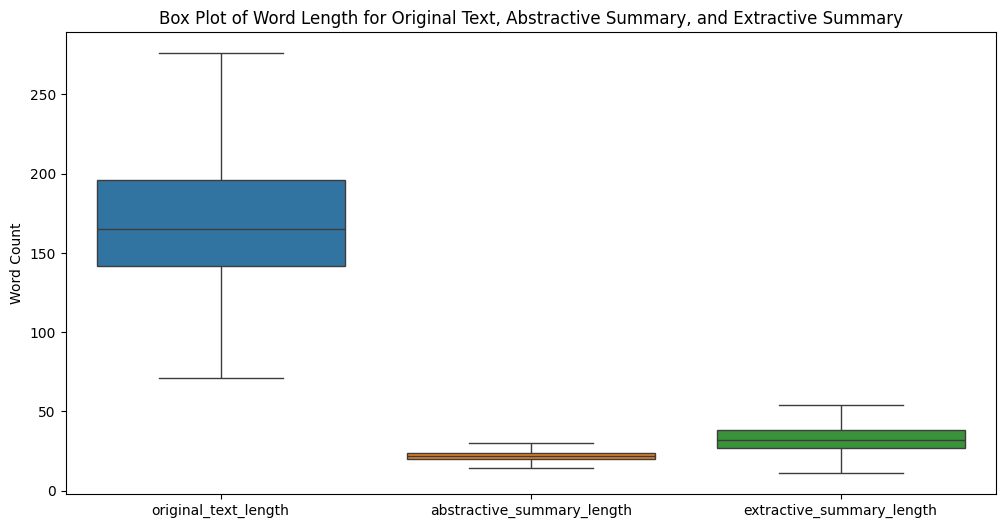

In [138]:
# make a boxplot based on train_df for column original_text, abstractive_summary, and extractive_summary

plt.figure(figsize=(12, 6))
sampled_dev_df['original_text_length'] = sampled_dev_df['original_text'].apply(lambda x: len(str(x).split()))
sampled_dev_df['abstractive_summary_length'] = sampled_dev_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
sampled_dev_df['extractive_summary_length'] = sampled_dev_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=sampled_dev_df[['original_text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Original Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')
plt.show()


In [139]:
sampled_dev_df.shape

(3000, 6)

In [140]:
# download sampled_dev_df with 3k data with no outlier into csv in my local
from google.colab import files

sampled_dev_df.to_csv('dev_df.csv', encoding = 'utf-8-sig')
files.download('dev_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prepare the TEST_CSV

## preparing column, convert to normal text

In [ ]:
import pandas as pd

In [39]:
test_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/normalized_dataset/test_normalized.csv')

In [40]:
test_df.iloc[1]

,1
id,22708
url,https://www.liputan6.com/news/read/22708/keret...
clean_article,"[['Liputan6', '.', 'com', ',', 'Yogyakarta', '..."
clean_summary,"[['Pemberangkatan', 'kereta', 'api', 'dari', '..."
extractive_summary,"[3, 4]"
rebuilt_extractive_summary,"[['Demikian', 'diungkapkan', 'seorang', 'petug..."
text,liputan6 com yogyakarta da...
summary,berangkat kereta api dari jalur se...
e_summary,demikian ungkap orang tugas pt kereta api indo...


In [41]:
# drop the column "extractive_summary", "text, "summary", and "e_summary"
test_df = test_df.drop(['id', 'url', 'extractive_summary', 'text', 'summary', 'e_summary'], axis=1)

In [42]:
# rename the column "clean_article" into "original_text"
test_df = test_df.rename(columns={"clean_article": "original_text"})
test_df = test_df.rename(columns={"clean_summary": "abstractive_summary"})
test_df = test_df.rename(columns={"rebuilt_extractive_summary": "extractive_summary"})

In [43]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to create new columns
test_df['original_text'] = test_df['original_text'].apply(clean_text)
test_df['abstractive_summary'] = test_df['abstractive_summary'].apply(clean_text)
test_df['extractive_summary'] = test_df['extractive_summary'].apply(clean_text)

In [45]:
test_df.head()

,original_text,abstractive_summary,extractive_summary
0,liputan6 com jakarta kejaksaan agung resmi men...,tommy soeharto kembali dicekal atas kasus kepe...,pencekalan tommy alias ibrahim kali ini berkai...
1,liputan6 com yogyakarta kedatangan kereta api ...,pemberangkatan kereta api dari jalur selatan k...,demikian diungkapkan seorang petugas pt kereta...
2,liputan6 com jakarta kejaksaan agung bakal men...,menyikapi putusan ma yang mengabulkan peninjau...,liputan6 com jakarta kejaksaan agung bakal men...
3,liputan6 com ambon sejumlah organisasi massa i...,sejumlah ormas islam di ambon mengecam rencana...,tujuannya mengecam rencana agresi militer amer...
4,liputan6 com bengkulu kehadiran kapal pukat ha...,masih banyak kapal yang menggunakan pukat hari...,menurut dia sudah saatnya izin bersyarat diber...


In [49]:
# download test_df into csv in my local
from google.colab import files

test_df.to_csv('test_df.csv', encoding = 'utf-8-sig')
files.download('test_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Remove outlier based on text length

In [141]:
# shape before outlier removed
test_df.shape

(10972, 3)

In [154]:
# prompt: see the outliers from train_df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_original_text = test_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_original_text = test_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_original_text = Q3_original_text - Q1_original_text
lower_bound_original_text = Q1_original_text - 1.5 * IQR_original_text
upper_bound_original_text = Q3_original_text + 1.5 * IQR_original_text

Q1_abstractive_summary = test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_abstractive_summary = test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_abstractive_summary = Q3_abstractive_summary - Q1_abstractive_summary
lower_bound_abstractive_summary = Q1_abstractive_summary - 1.5 * IQR_abstractive_summary
upper_bound_abstractive_summary = Q3_abstractive_summary + 1.5 * IQR_abstractive_summary


Q1_extractive_summary = test_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_extractive_summary = test_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_extractive_summary = Q3_extractive_summary - Q1_extractive_summary
lower_bound_extractive_summary = Q1_extractive_summary - 1.5 * IQR_extractive_summary
upper_bound_extractive_summary = Q3_extractive_summary + 1.5 * IQR_extractive_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = test_df[
    ~(test_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
      test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
      test_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary))
]

print("Outliers in test_df:")
print(outliers)

Outliers in test_df:
Empty DataFrame
Columns: [original_text, abstractive_summary, extractive_summary, original_text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [155]:
# delete those rows as outlier in test_df
# Remove rows with outliers

test_df = test_df[
    test_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
    test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
    test_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary)
]

print("DataFrame shape after removing outliers:", test_df.shape)

DataFrame shape after removing outliers: (9775, 6)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

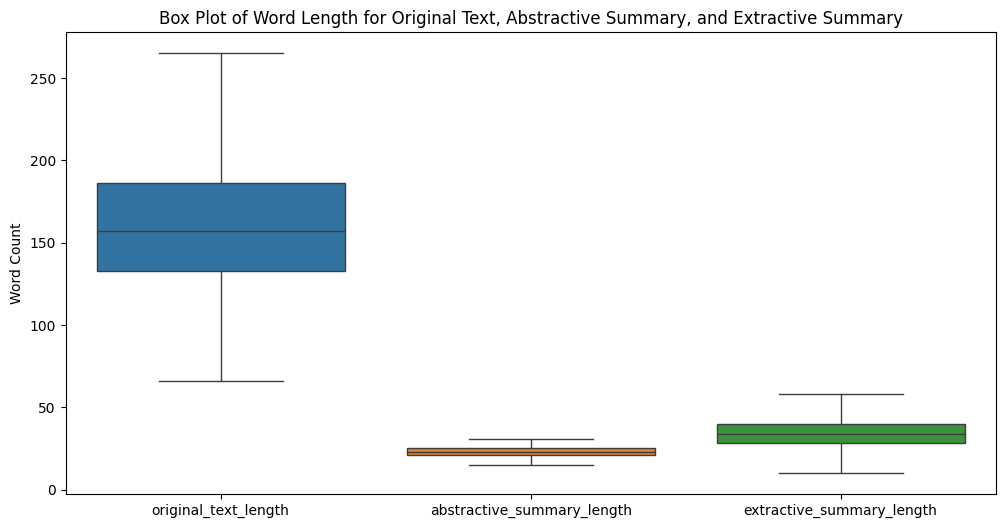

In [156]:
# make a boxplot based on dev_df for column original_text, abstractive_summary, and extractive_summary

plt.figure(figsize=(12, 6))
test_df['original_text_length'] = test_df['original_text'].apply(lambda x: len(str(x).split()))
test_df['abstractive_summary_length'] = test_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
test_df['extractive_summary_length'] = test_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=test_df[['original_text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Original Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')

plt.show()


In [157]:
# drop column original_text_length, abstractive_summary_length, extractive_summary_length

test_df = test_df.drop(['original_text_length', 'abstractive_summary_length', 'extractive_summary_length'], axis=1)


In [158]:
test_df.shape

(9775, 3)

In [159]:
# download test_df with no outlier into csv in my local
from google.colab import files

test_df.to_csv('test_df.csv', encoding = 'utf-8-sig')
files.download('test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## random sampling 3k row test_df

In [160]:
# random sampling 3k data from test_df

sampled_test_df = test_df.sample(n=3000, random_state=42)


In [161]:
sampled_test_df.shape

(3000, 3)

In [165]:
# prompt: see the outliers from train_df

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each column
Q1_original_text = sampled_test_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_original_text = sampled_test_df['original_text'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_original_text = Q3_original_text - Q1_original_text
lower_bound_original_text = Q1_original_text - 1.5 * IQR_original_text
upper_bound_original_text = Q3_original_text + 1.5 * IQR_original_text

Q1_abstractive_summary = sampled_test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_abstractive_summary = sampled_test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_abstractive_summary = Q3_abstractive_summary - Q1_abstractive_summary
lower_bound_abstractive_summary = Q1_abstractive_summary - 1.5 * IQR_abstractive_summary
upper_bound_abstractive_summary = Q3_abstractive_summary + 1.5 * IQR_abstractive_summary


Q1_extractive_summary = sampled_test_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.25)
Q3_extractive_summary = sampled_test_df['extractive_summary'].apply(lambda x: len(str(x).split())).quantile(0.75)
IQR_extractive_summary = Q3_extractive_summary - Q1_extractive_summary
lower_bound_extractive_summary = Q1_extractive_summary - 1.5 * IQR_extractive_summary
upper_bound_extractive_summary = Q3_extractive_summary + 1.5 * IQR_extractive_summary


# Find rows with outliers in 'text_length', 'summary_length', and 'e_summary_length'
outliers = sampled_test_df[
    ~(sampled_test_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
      sampled_test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
      sampled_test_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary))
]

print("Outliers in sampled_test_df:")
print(outliers)

Outliers in sampled_test_df:
Empty DataFrame
Columns: [original_text, abstractive_summary, extractive_summary, original_text_length, abstractive_summary_length, extractive_summary_length]
Index: []


In [166]:
# delete those rows as outlier in train_df

# Remove rows with outliers
sampled_test_df = sampled_test_df[
    sampled_test_df['original_text'].apply(lambda x: len(str(x).split())).between(lower_bound_original_text, upper_bound_original_text) &
    sampled_test_df['abstractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_abstractive_summary, upper_bound_abstractive_summary) &
    sampled_test_df['extractive_summary'].apply(lambda x: len(str(x).split())).between(lower_bound_extractive_summary, upper_bound_extractive_summary)
]

print("DataFrame shape after removing outliers:", sampled_test_df.shape)

DataFrame shape after removing outliers: (2991, 6)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

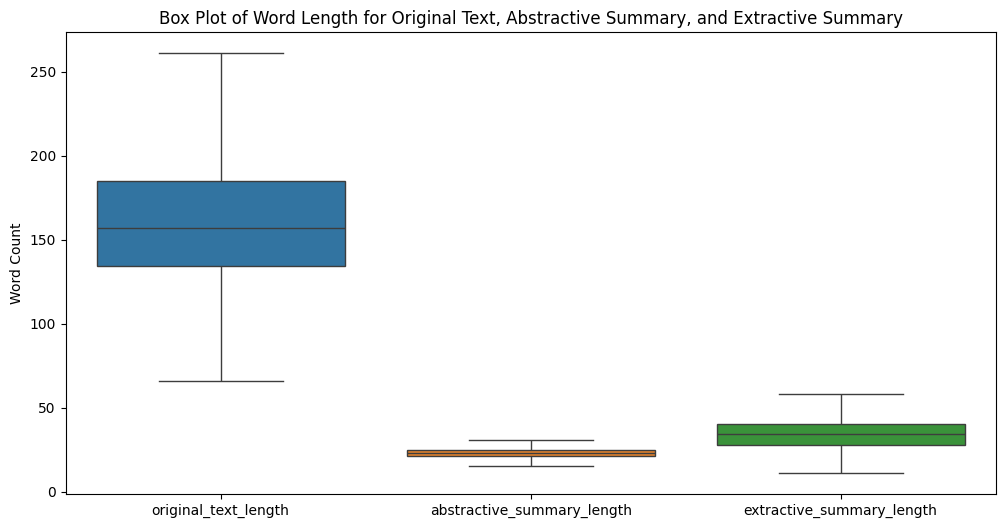

In [167]:
# make a boxplot based on train_df for column original_text, abstractive_summary, and extractive_summary

plt.figure(figsize=(12, 6))
sampled_test_df['original_text_length'] = sampled_test_df['original_text'].apply(lambda x: len(str(x).split()))
sampled_test_df['abstractive_summary_length'] = sampled_test_df['abstractive_summary'].apply(lambda x: len(str(x).split()))
sampled_test_df['extractive_summary_length'] = sampled_test_df['extractive_summary'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=sampled_test_df[['original_text_length', 'abstractive_summary_length', 'extractive_summary_length']])
plt.title('Box Plot of Word Length for Original Text, Abstractive Summary, and Extractive Summary')
plt.ylabel('Word Count')
plt.show()


In [168]:
sampled_test_df.shape

(2991, 6)

In [169]:
# download sampled_test_df with 3k data with no outlier into csv in my local
from google.colab import files

sampled_test_df.to_csv('test_df.csv', encoding = 'utf-8-sig')
files.download('test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>